In [1]:
# import rasterio
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd

# # Load bathymetry data
# tif_file = r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\2. QGIS + Wflow\DATA\2025-01-14 Dahiti\13220_bathymetry.tif"  # Update with correct path

# with rasterio.open(tif_file) as src:
#     bathymetry = src.read(1).astype(float)  # Read as float
#     transform = src.transform  # Get transformation for spatial calculations
#     nodata_value = src.nodata  # Get NoData value if present

# # Replace NoData values with NaN
# if nodata_value is not None:
#     bathymetry[bathymetry == nodata_value] = np.nan  # Replace NoData with NaN

# # Determine the lake bottom (minimum valid bathymetry value)
# lake_bottom = np.nanmin(bathymetry)
# lake_max = np.nanmax(bathymetry)

# # Replace NaN values with lake bottom to avoid missing data issues
# bathymetry = np.where(np.isnan(bathymetry), lake_bottom, bathymetry)

# # Get pixel size (assumes square pixels)
# pixel_area = abs(transform.a * transform.e)  # Cell area

# # Generate 50 water level values between lake bottom and max
# water_levels = np.linspace(lake_bottom, lake_max, 50)

# # Compute volume at each water level
# volumes = []

# for wl in water_levels:
#     depth = np.maximum(0, wl - bathymetry)  # Water depth at each pixel
#     total_volume = np.sum(depth * pixel_area)  # Total lake volume
#     volumes.append(total_volume)

# # Save results to CSV
# csv_filename = "lake_volume_curve.csv"
# df = pd.DataFrame({"Water Level (m)": water_levels, "Lake Volume (m³)": volumes})
# df.to_csv(csv_filename, index=False)
# print(f"Lake volume curve saved to {csv_filename}")

# # Plot volume vs. water level curve
# plt.figure(figsize=(8, 6))
# plt.plot(water_levels, volumes, label="Lake Volume Curve", color="b")
# plt.xlabel("Water Level (m)")
# plt.ylabel("Lake Volume (m³)")
# plt.title("Lake Volume vs. Water Level")
# plt.legend()
# plt.grid()
# plt.show()



In [2]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load bathymetry data
tif_file = r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\2. QGIS + Wflow\DATA\2025-01-14 Dahiti\13220_bathymetry.tif"  # Update with correct path  # Update with correct file path
with rasterio.open(tif_file) as src:
    bathymetry = src.read(1).astype(float)  # Read as float
    transform = src.transform  # Get transformation for spatial calculations
    nodata_value = src.nodata  # Get NoData value if present

# Replace NoData values with NaN
if nodata_value is not None:
    bathymetry[bathymetry == nodata_value] = np.nan  # Replace NoData with NaN

# Determine the lake bottom (minimum valid bathymetry value)
lake_bottom = np.nanmin(bathymetry)
lake_max = np.nanmax(bathymetry)

# Remove NaN values
bathymetry = bathymetry[~np.isnan(bathymetry)]

# Get pixel size in degrees
pixel_width_deg = abs(transform.a)
pixel_height_deg = abs(transform.e)

# Convert pixel size to meters (approximation)
# Assuming the location is near the equator for simplicity
latitude = 0  # Change this to the actual latitude if known
meters_per_degree_lat = 111320  # Approximate meters per degree of latitude
meters_per_degree_lon = 111320 * np.cos(np.radians(latitude))  # Approximate meters per degree of longitude

pixel_area = pixel_width_deg * meters_per_degree_lon * pixel_height_deg * meters_per_degree_lat  # Cell area in square meters

# Generate 50 water level values between lake bottom and max
water_levels = np.linspace(lake_bottom, lake_max, 50)

# Compute volume and surface area at each water level
volumes = []
areas = []

for wl in water_levels:
    depth = np.maximum(0, wl - bathymetry)  # Water depth at each pixel
    flooded_area = (depth > 0)  # Boolean mask for flooded areas
    area = np.sum(flooded_area) * pixel_area  # Surface area at this level in square meters
    volume = np.sum(depth * pixel_area)  # Total volume at this water level in cubic meters

    areas.append(area / 1e6)  # Convert area to square kilometers
    volumes.append(volume / 1e9)  # Convert volume to cubic kilometers

print(bathymetry)



[1766.73681641 1766.60803223 1766.48461914 ... 1766.56628418 1766.67883301
 1766.67883301]


Lake volume and area curve saved to lake_volume_area_curve.csv


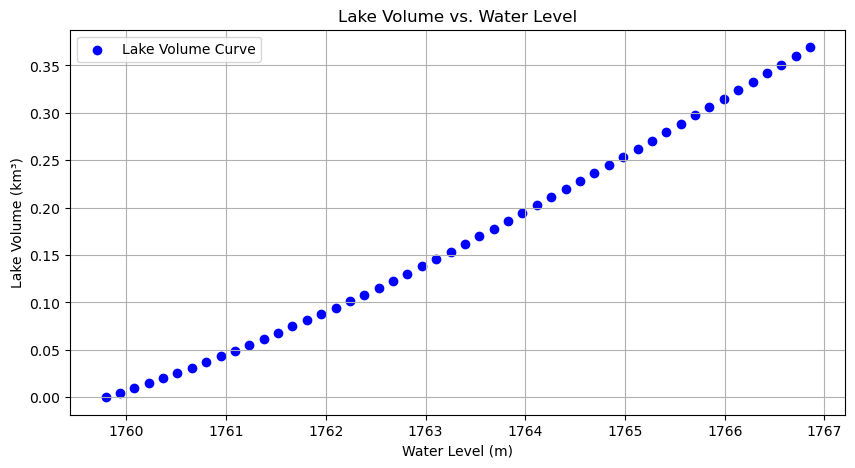

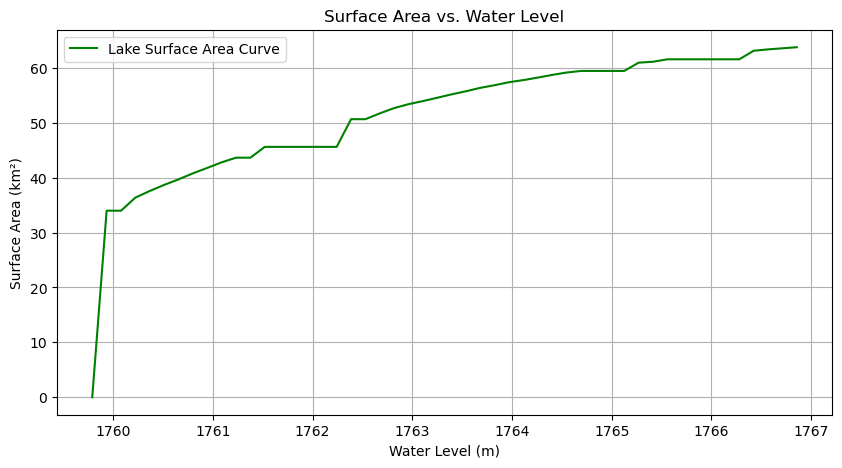

In [3]:
# Save results to CSV
csv_filename = "lake_volume_area_curve.csv"
df = pd.DataFrame({"Water Level (m)": water_levels, "Lake Volume (km³)": volumes, "Surface Area (m²)": areas})
df.to_csv(csv_filename, index=False)
print(f"Lake volume and area curve saved to {csv_filename}")

# Plot volume vs. water level curve
plt.figure(figsize=(10, 5))
plt.scatter(water_levels, volumes, label="Lake Volume Curve", color="b")
plt.xlabel("Water Level (m)")
plt.ylabel("Lake Volume (km³)")
plt.title("Lake Volume vs. Water Level")
plt.legend()
plt.grid()
plt.show()

# Plot area vs. water level curve
plt.figure(figsize=(10, 5))
plt.plot(water_levels, areas, label="Lake Surface Area Curve", color="g")
plt.xlabel("Water Level (m)")
plt.ylabel("Surface Area (km²)")
plt.title("Surface Area vs. Water Level")
plt.legend()
plt.grid()
plt.show()

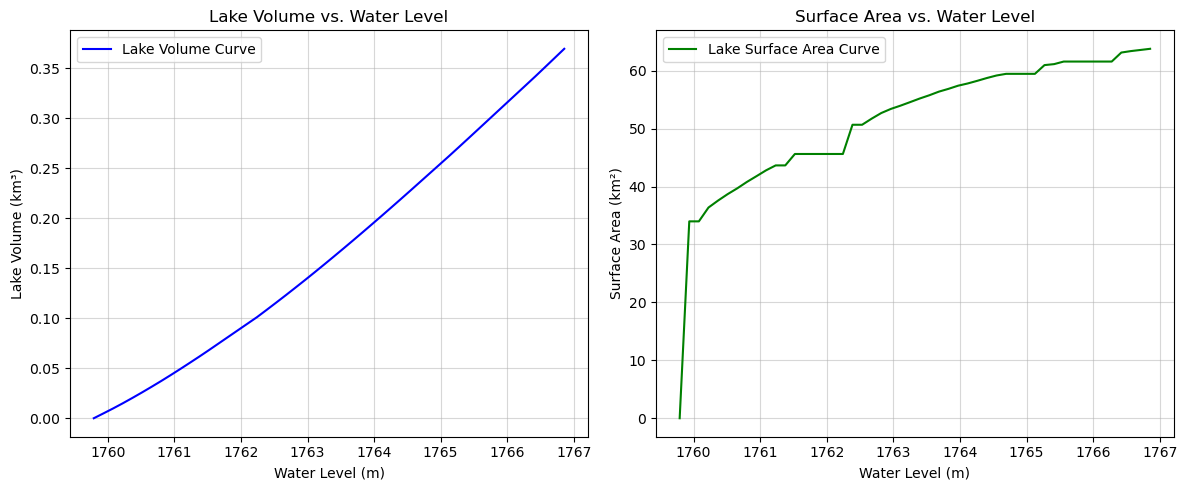

In [15]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot volume vs. water level
axs[0].plot(water_levels, volumes, label="Lake Volume Curve", color="b")
axs[0].set_xlabel("Water Level (m)")
axs[0].set_ylabel("Lake Volume (km³)")
axs[0].set_title("Lake Volume vs. Water Level")
axs[0].legend()
axs[0].grid(alpha=0.5)

# Plot area vs. water level
axs[1].plot(water_levels, areas, label="Lake Surface Area Curve", color="g")
axs[1].set_xlabel("Water Level (m)")
axs[1].set_ylabel("Surface Area (km²)")
axs[1].set_title("Surface Area vs. Water Level")
axs[1].legend()
axs[1].grid(alpha=0.5)

plt.tight_layout()

plt.savefig(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\5. Python\Figures\lake_volume_area_curve.png", dpi=300, bbox_inches='tight')
plt.show()